In [76]:
import numpy as np
from cube2x2 import Cube
from visualize import visualize_cube
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Q_nstep = np.loadtxt('nstep_Q.txt')

In [3]:
Q_nstep[364159] = np.zeros((6))

In [4]:
policy_nstep = np.argmax(Q_nstep, axis=1)

In [5]:
Q_sarsa = np.loadtxt('sarsa0_Q.txt')
Q_sarsa[364159] = np.zeros((6))

In [6]:
sarsa_steps = np.loadtxt('steps_sarsa.txt')

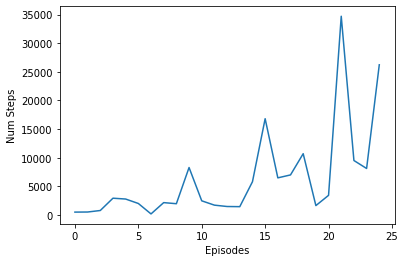

In [61]:
plt.plot(range(25), sarsa_steps)
plt.xlabel('Episodes')
plt.ylabel('Num Steps')
plt.show()

In [8]:
policy_sarsa = np.argmax(Q_sarsa, axis=1)

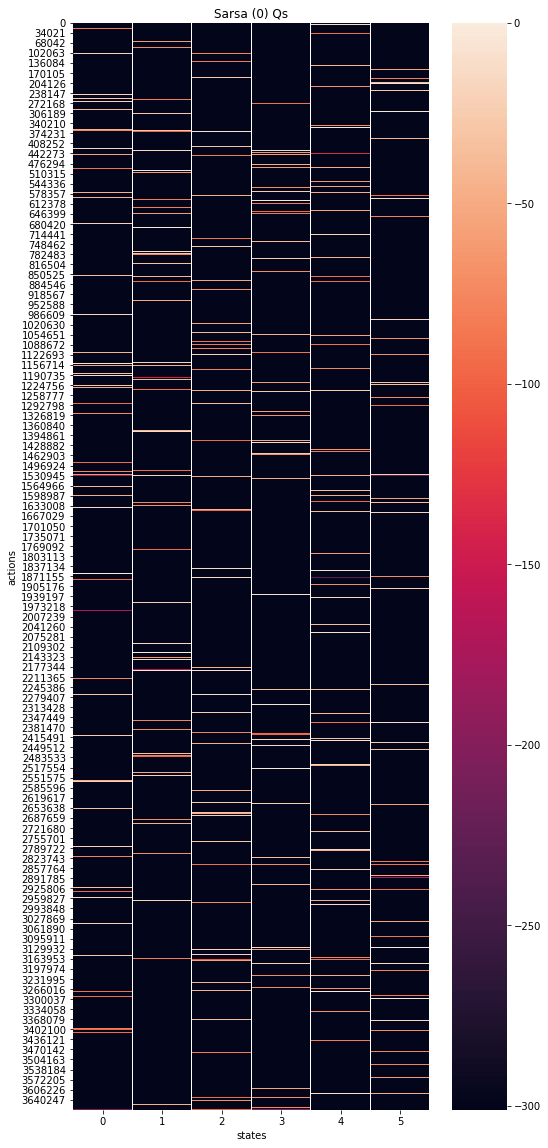

In [82]:
plt.figure(figsize=(8,20))
sns.heatmap(Q_sarsa)
plt.xlabel('states')
plt.ylabel('actions')
plt.title('Sarsa (0) Qs')
plt.show()

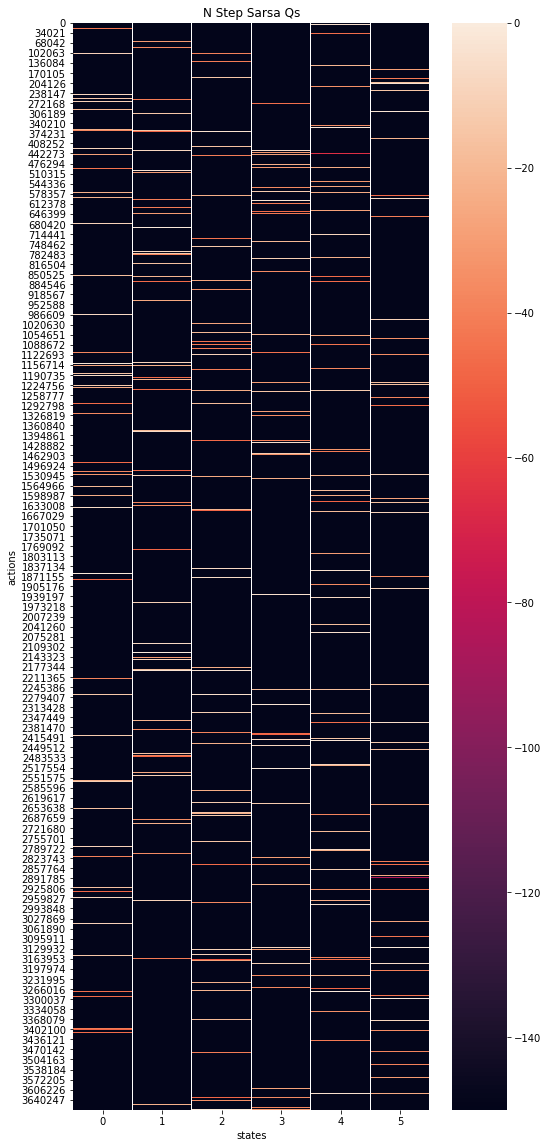

In [85]:
plt.figure(figsize=(8,20))
sns.heatmap(Q_nstep, vmin=-150)
plt.xlabel('states')
plt.ylabel('actions')
plt.title('N Step Sarsa Qs')
plt.show()

Since I didn't run on many episodes due to time constraints, I will not be trying all test instances of random shuffling, as many will most likely not converge. Instead, I will test how the policies perform on states of the cube up to 10 steps away from the goal state.

In [9]:
cube2x2 = Cube()

In [14]:
def get_state_n_away(cube, n):
    
    cube.current_s = cube.terminal_s
    
    prev_action = -1
    for i in range(n):
        action = np.random.randint(6)
        # prevent going backwards
        if action % 2 == 0:    
            while action+1 == prev_action:
                action = np.random.randint(6)
        else:
            while action-1 == prev_action:
                action = np.random.randint(6)
        
        # go to state
        cube.step(action)
        
        prev_action = action
        
    return cube.current_s

In [35]:
get_state_n_away(cube2x2, 1)

29158

In [94]:
def test_policies(cube, policy, n_steps, n_iters):
    """
    tests policies from 1 to n steps away from goal state, 
    averages number of steps needed for n_iters (100) tries of solving cube
    """
    
    stepstogoal = []
    for i in range(1, n_steps + 1):
        
        steps = []
        for ep in range(n_iters):
            
            s = 0
            cube.current_s = get_state_n_away(cube, i)
            
            # prevent infinite loop of actions
            prev_a = -1
            save = True
            while cube.current_s != cube.terminal_s:
                
                action = policy[cube.current_s]
                cube.step(action)
                
                if s % 2 == 0:
                    if prev_a == action:
                        save = False
                        break
                    prev_a = action
                    
                s += 1
                
            if save:
                steps.append(s)
            print('ep {} done'.format(ep))
        
        stepstogoal.append(np.mean(steps))
        print('{} away done'.format(i))
        
    return stepstogoal
        

In [96]:
evalpolicy_sarsa = test_policies(cube2x2, policy_sarsa, 5, 100)

ep 0 done
ep 1 done
ep 2 done
ep 3 done
ep 4 done
ep 5 done
ep 6 done
ep 7 done
ep 8 done
ep 9 done
ep 10 done
ep 11 done
ep 12 done
ep 13 done
ep 14 done
ep 15 done
ep 16 done
ep 17 done
ep 18 done
ep 19 done
ep 20 done
ep 21 done
ep 22 done
ep 23 done
ep 24 done
ep 25 done
ep 26 done
ep 27 done
ep 28 done
ep 29 done
ep 30 done
ep 31 done
ep 32 done
ep 33 done
ep 34 done
ep 35 done
ep 36 done
ep 37 done
ep 38 done
ep 39 done
ep 40 done
ep 41 done
ep 42 done
ep 43 done
ep 44 done
ep 45 done
ep 46 done
ep 47 done
ep 48 done
ep 49 done
ep 50 done
ep 51 done
ep 52 done
ep 53 done
ep 54 done
ep 55 done
ep 56 done
ep 57 done
ep 58 done
ep 59 done
ep 60 done
ep 61 done
ep 62 done
ep 63 done
ep 64 done
ep 65 done
ep 66 done
ep 67 done
ep 68 done
ep 69 done
ep 70 done
ep 71 done
ep 72 done
ep 73 done
ep 74 done
ep 75 done
ep 76 done
ep 77 done
ep 78 done
ep 79 done
ep 80 done
ep 81 done
ep 82 done
ep 83 done
ep 84 done
ep 85 done
ep 86 done
ep 87 done
ep 88 done
ep 89 done
ep 90 done
ep 91 don

In [97]:
evalpolicy_sarsa

[nan, nan, nan, 0.0, nan]

In [98]:
evalpolicy_nstep = test_policies(cube2x2, policy_nstep, 5, 100)

ep 0 done
ep 1 done
ep 2 done
ep 3 done
ep 4 done
ep 5 done
ep 6 done
ep 7 done
ep 8 done
ep 9 done
ep 10 done
ep 11 done
ep 12 done
ep 13 done
ep 14 done
ep 15 done
ep 16 done
ep 17 done
ep 18 done
ep 19 done
ep 20 done
ep 21 done
ep 22 done
ep 23 done
ep 24 done
ep 25 done
ep 26 done
ep 27 done
ep 28 done
ep 29 done
ep 30 done
ep 31 done
ep 32 done
ep 33 done
ep 34 done
ep 35 done
ep 36 done
ep 37 done
ep 38 done
ep 39 done
ep 40 done
ep 41 done
ep 42 done
ep 43 done
ep 44 done
ep 45 done
ep 46 done
ep 47 done
ep 48 done
ep 49 done
ep 50 done
ep 51 done
ep 52 done
ep 53 done
ep 54 done
ep 55 done
ep 56 done
ep 57 done
ep 58 done
ep 59 done
ep 60 done
ep 61 done
ep 62 done
ep 63 done
ep 64 done
ep 65 done
ep 66 done
ep 67 done
ep 68 done
ep 69 done
ep 70 done
ep 71 done
ep 72 done
ep 73 done
ep 74 done
ep 75 done
ep 76 done
ep 77 done
ep 78 done
ep 79 done
ep 80 done
ep 81 done
ep 82 done
ep 83 done
ep 84 done
ep 85 done
ep 86 done
ep 87 done
ep 88 done
ep 89 done
ep 90 done
ep 91 don

In [99]:
evalpolicy_nstep

[1.0, nan, 1.0, 0.0, nan]